In [7]:
import mysql.connector
import stuff
import pandas as pd

In [34]:
cnx = mysql.connector.connect(
    host = stuff.host,
    user = stuff.user,
    passwd = stuff.password)

In [35]:
cursor = cnx.cursor()

In [36]:
cnx.database = 'nyc_public_high_schools_grad_rate'

In [8]:
cursor.execute("""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
FROM nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
ON nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
WHERE nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' AND
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June' AND
nyc_public_high_schools_grad_rate.regents.regents_exam = 'Common Core Algebra'
;
""")

InternalError: Unread result found

In [9]:
df = pd.DataFrame(cursor.fetchall())

In [10]:
df.columns = [x[0] for x in cursor.description]

In [13]:
df

,school_name,school_name,regents_exam,percent_graduated,percent_scoring_65_or_above
0,Orchard Collegiate Academy,ORCHARD COLLEGIATE ACADEMY,Common Core Algebra,66.7,71.7
1,University Neighborhood High School,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Common Core Algebra,89.7,80.4
2,East Side Community School,EAST SIDE COMMUNITY SCHOOL,Common Core Algebra,89.9,83.3
3,Forsyth Satellite Academy,FORSYTH SATELLITE ACADEMY,Common Core Algebra,14.9,0.0
4,Marta Valle High School,MARTA VALLE HIGH SCHOOL,Common Core Algebra,66.1,39.5
5,Lower East Side Preparatory High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,Common Core Algebra,35.8,82.6
6,Cascades High School,CASCADES HIGH SCHOOL,Common Core Algebra,23.6,60.0
7,Bard High School Early College,BARD HIGH SCHOOL EARLY COLLEGE,Common Core Algebra,94.7,94.3
8,47 The American Sign Language and English Seco...,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,Common Core Algebra,91.4,77.3
9,The Urban Assembly School for Emergency Manage...,THE URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGE...,Common Core Algebra,67.0,70.1


In [19]:
df.dropna(inplace = True)

In [20]:
df

,school_name,school_name,regents_exam,percent_graduated,percent_scoring_65_or_above
0,Orchard Collegiate Academy,ORCHARD COLLEGIATE ACADEMY,Common Core Algebra,66.7,71.7
1,University Neighborhood High School,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Common Core Algebra,89.7,80.4
2,East Side Community School,EAST SIDE COMMUNITY SCHOOL,Common Core Algebra,89.9,83.3
3,Forsyth Satellite Academy,FORSYTH SATELLITE ACADEMY,Common Core Algebra,14.9,0.0
4,Marta Valle High School,MARTA VALLE HIGH SCHOOL,Common Core Algebra,66.1,39.5
5,Lower East Side Preparatory High School,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,Common Core Algebra,35.8,82.6
6,Cascades High School,CASCADES HIGH SCHOOL,Common Core Algebra,23.6,60.0
7,Bard High School Early College,BARD HIGH SCHOOL EARLY COLLEGE,Common Core Algebra,94.7,94.3
8,47 The American Sign Language and English Seco...,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,Common Core Algebra,91.4,77.3
9,The Urban Assembly School for Emergency Manage...,THE URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGE...,Common Core Algebra,67.0,70.1


In [14]:
import matplotlib.pyplot as plt

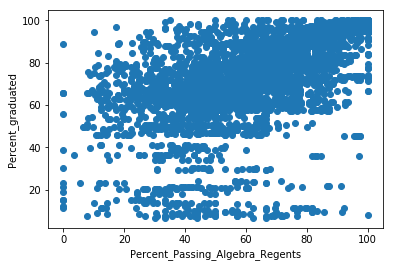

In [15]:
plt.scatter(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))
plt.xlabel('Percent_Passing_Algebra_Regents')
plt.ylabel('Percent_graduated')
plt.show()

In [17]:
import statsmodels.api as sm

In [22]:
x=sm.OLS(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))

In [23]:
results = x.fit()

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 3.262e+04
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:01:30   Log-Likelihood:                -15624.
No. Observations:                3531   AIC:                         3.125e+04
Df Residuals:                    3530   BIC:                         3.126e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8316      0.005    180.609      0.0

In [30]:

import scipy.stats as stats

In [33]:
stats.pearsonr(list(df['percent_scoring_65_or_above']),list(df['percent_graduated']))

(0.5116510812520553, 6.691616497443869e-235)

In [ ]:
#get all the data for all students comparing the grad rate and all the different types of regents
"""SELECT
nyc_public_high_schools_grad_rate.regents.school_name,
nyc_public_high_schools_grad_rate.gradrate.school_name,
nyc_public_high_schools_grad_rate.regents.regents_exam,
nyc_public_high_schools_grad_rate.gradrate.percent_graduated,
nyc_public_high_schools_grad_rate.regents.percent_scoring_65_or_above
from nyc_public_high_schools_grad_rate.gradrate 
join nyc_public_high_schools_grad_rate.regents 
on nyc_public_high_schools_grad_rate.regents.school_name=nyc_public_high_schools_grad_rate.gradrate.school_name
where nyc_public_high_schools_grad_rate.gradrate.demographic= 'All Students' and
nyc_public_high_schools_grad_rate.gradrate.cohort = '4 year June'
;"""

In [ ]:
cursor.execute("""TRUNCATE TABLE regents
""")

In [ ]:
cnx.commit()